In [10]:
key = pd.read_csv("data/key.csv")
key.tail()

,store_nbr,station_nbr
40,41,12
41,42,14
42,43,11
43,44,12
44,45,16


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


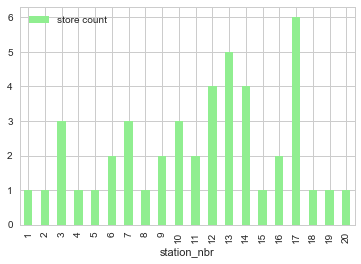

In [25]:
k = key.groupby("station_nbr").size().reset_index()
k.plot.bar(x='station_nbr', y=0, label="store count", colors='lightgreen')
plt.show()

In [2]:
weather = pd.read_csv("weather_imputation.csv")
weather['date'] = pd.to_datetime(weather['date'])
weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day
20512,16,2014-10-31,53.0,34.0,44.0,NaN,35.0,41.0,21.0,0.0,...,NaN,0.00,29.90,29.99,4.5,3.0,5.3,2014,10,31
20513,17,2014-10-31,59.0,34.0,47.0,NaN,32.0,41.0,18.0,0.0,...,0.0,0.00,29.72,30.39,9.2,1.0,9.3,2014,10,31
20514,18,2014-10-31,67.0,49.0,58.0,-4.0,40.0,50.0,7.0,0.0,...,0.0,0.00,29.78,30.28,10.6,36.0,11.2,2014,10,31
20515,19,2014-10-31,45.0,33.0,39.0,-6.0,24.0,32.0,26.0,0.0,...,0.1,0.02,29.51,30.24,20.4,34.0,20.9,2014,10,31
20516,20,2014-10-31,68.0,50.0,59.0,NaN,39.0,50.0,6.0,0.0,...,0.0,0.00,29.57,30.27,10.5,36.0,11.2,2014,10,31


In [39]:
wthr = pd.read_csv("data_monthmean/station1_monthmean.csv")
for i in range(2,21):
    if i == 5:
        station = weather[weather['station_nbr']==5]
    else:
        station = pd.read_csv("data_monthmean/station" + str(i) + "_monthmean.csv")
    wthr = pd.concat([wthr,station], axis=0)
wthr.reset_index(drop=True, inplace=True)
wthr.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day
20512,20,2014-10-27,85.0,66.0,75.5,NaN,59.0,65.0,0.0,11.0,...,0.0,0.0,29.11,29.82,10.0,18.0,10.4,2014,10,27
20513,20,2014-10-28,80.0,68.0,74.0,NaN,60.0,65.0,0.0,9.0,...,0.0,0.0,29.30,29.97,3.1,36.0,6.4,2014,10,28
20514,20,2014-10-29,78.0,55.0,66.5,NaN,47.0,56.0,0.0,2.0,...,0.0,0.0,29.42,30.12,4.9,6.0,6.1,2014,10,29
20515,20,2014-10-30,80.0,52.0,66.0,NaN,50.0,57.0,0.0,1.0,...,0.0,0.0,29.40,30.11,1.6,14.0,4.9,2014,10,30
20516,20,2014-10-31,68.0,50.0,59.0,NaN,39.0,50.0,6.0,0.0,...,0.0,0.0,29.57,30.27,10.5,36.0,11.2,2014,10,31


In [40]:
import datetime as dt
# 상대습도 계산
wthr["relative_humility"] = 100*(np.exp((17.625*((wthr['dewpoint']-32)/1.8))/(243.04+((wthr['dewpoint']-32)/1.8)))/np.exp((17.625*((wthr['tavg']-32)/1.8))/(243.04+((wthr['tavg']-32)/1.8))))

# 체감온도 계산
wthr["windchill"] = 35.74 + 0.6215*wthr["tavg"] - 35.75*(wthr["avgspeed"]**0.16) + 0.4275*wthr["tavg"]*(wthr["avgspeed"]**0.16)

# sunset, sunrise로 낮시간 계산
wthr['daytime'] = (((wthr['sunset'] // 100 * 60) + (wthr['sunset'] % 100))- ((wthr['sunrise'] // 100 * 60) + (wthr['sunrise'] % 100))) / 60

# 날짜데이터 datetime 변환
wthr["date"] = pd.to_datetime(wthr["date"])

# # date 년, 월, 일 columns 추가하기
# wthr["date_y"] = wthr["date"].dt.year
# wthr["date_m"] = wthr["date"].dt.month
# wthr["date_d"] = wthr["date"].dt.day

# 요일 columns 추가(monday = 0, sunday = 6), 주말 columns 추가
# 평일 : 0, 토요일, 일요일 : 1
wthr["week7"] = wthr["date"].dt.dayofweek
wthr['weekend'] = 0
wthr.loc[wthr['week7'] == 5, 'weekend'] = 1
wthr.loc[wthr['week7'] == 6, 'weekend'] = 1

In [41]:
wthr.station_nbr.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

In [7]:
wthr.corr()

,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,...,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend
station_nbr,1.000000,-0.088052,-0.089444,-0.090389,-0.000061,-0.084661,-0.095065,0.089351,-0.060931,-0.044692,...,-0.011825,0.017381,-0.008804,-0.006551,0.000029,-0.024448,-0.087826,0.006622,0.000009,-0.000018
tmax,-0.088052,1.000000,0.921816,0.980761,0.385229,0.876740,0.942234,-0.921984,0.751064,-0.414651,...,-0.208480,-0.149372,-0.018216,0.241397,0.019697,-0.133427,0.980841,0.610856,-0.003439,-0.001199
tmin,-0.089444,0.921816,1.000000,0.979657,0.364865,0.947238,0.976319,-0.901794,0.783316,-0.447993,...,-0.242290,-0.086960,-0.017409,0.261468,0.017661,0.064262,0.975363,0.627472,0.000353,0.002632
tavg,-0.090389,0.980761,0.979657,1.000000,0.382901,0.929829,0.978340,-0.930283,0.782333,-0.440189,...,-0.229648,-0.120862,-0.018126,0.256548,0.019070,-0.036908,0.997871,0.632102,-0.001555,0.000750
depart,-0.000061,0.385229,0.364865,0.382901,1.000000,0.365185,0.368785,-0.388298,0.252338,0.038978,...,-0.025572,0.100976,-0.193977,-0.044810,0.012043,-0.007477,0.380035,-0.026686,-0.016262,-0.016372
dewpoint,-0.084661,0.876740,0.947238,0.929829,0.365185,1.000000,0.979437,-0.876370,0.712872,-0.425663,...,-0.268361,-0.155399,-0.008738,0.267541,0.009257,0.325359,0.930246,0.590656,0.005078,0.005506
wetbulb,-0.095065,0.942234,0.976319,0.978340,0.368785,0.979437,1.000000,-0.922317,0.749245,-0.448910,...,-0.252326,-0.141255,-0.007107,0.263919,0.016931,0.149384,0.977419,0.626536,0.001865,0.003704
heat,0.089351,-0.921984,-0.901794,-0.930283,-0.388298,-0.876370,-0.922317,1.000000,-0.537487,0.413826,...,0.218976,0.132277,0.041272,-0.233945,-0.020867,0.004501,-0.930542,-0.579195,-0.002991,-0.006497
cool,-0.060931,0.751064,0.783316,0.782333,0.252338,0.712872,0.749245,-0.537487,1.000000,-0.346220,...,-0.173440,-0.075100,0.006250,0.206681,0.006957,-0.068764,0.777442,0.519798,-0.003260,-0.007774
sunrise,-0.044692,-0.414651,-0.447993,-0.440189,0.038978,-0.425663,-0.448910,0.413826,-0.346220,1.000000,...,0.065383,0.011437,-0.153123,-0.021682,-0.010485,-0.026585,-0.437014,-0.913808,-0.001159,0.001322


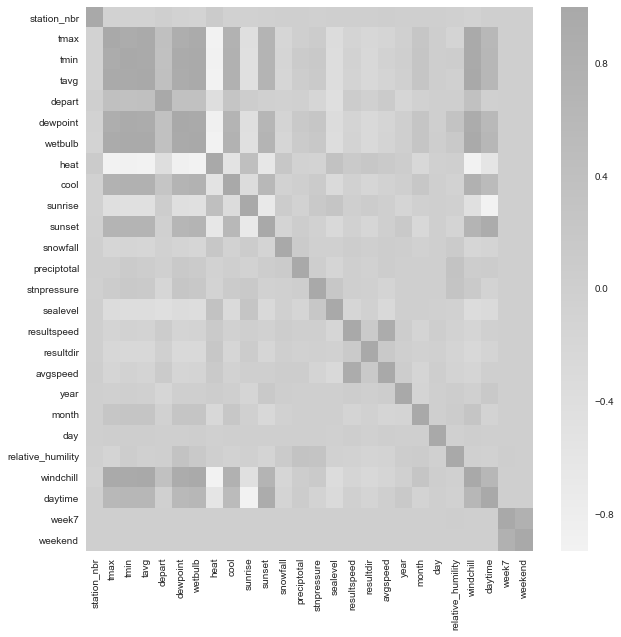

In [8]:
plt.figure(figsize=(10,10))
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(wthr.corr(), annot=False, cmap=cmap)
plt.show()

In [67]:
wthr.to_csv("weather2_180701.csv", index=False)

In [48]:
wthr['code_change'] = 0
wthr.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change
20512,20,2014-10-27,85.0,66.0,75.5,NaN,59.0,65.0,0.0,11.0,...,10.4,2014,10,27,56.581549,77.610546,NaN,0,0,0
20513,20,2014-10-28,80.0,68.0,74.0,NaN,60.0,65.0,0.0,9.0,...,6.4,2014,10,28,61.651562,76.192928,NaN,1,0,0
20514,20,2014-10-29,78.0,55.0,66.5,NaN,47.0,56.0,0.0,2.0,...,6.1,2014,10,29,49.457615,67.292021,NaN,2,0,0
20515,20,2014-10-30,80.0,52.0,66.0,NaN,50.0,57.0,0.0,1.0,...,4.9,2014,10,30,56.299244,67.042393,NaN,3,0,0
20516,20,2014-10-31,68.0,50.0,59.0,NaN,39.0,50.0,6.0,0.0,...,11.2,2014,10,31,47.379814,56.913195,NaN,4,0,0


In [63]:
len(wthr[wthr['codesum'].values == 'MD'].index), len(wthr[wthr['codesum'].values == 'RA'].index)

(11051, 1281)

In [64]:
for idx in wthr.codesum.index:
    if 'RA' in wthr.loc[idx,'codesum']:
        wthr.loc[idx, 'code_change'] = 2
    elif 'MD' in wthr.loc[idx,'codesum']:
        wthr.loc[idx, 'code_change'] = 0
    else:
        wthr.loc[idx, 'code_change'] = 1
wthr.code_change.unique()

array([2, 0, 1], dtype=int64)

In [66]:
wthr.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change
0,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,4.6,2012,1,1,80.661325,38.542999,NaN,6,1,2
1,1,2012-01-02,50.0,31.0,40.5,NaN,26.0,35.0,24.0,0.0,...,10.3,2012,1,2,55.933048,34.135931,NaN,0,0,0
2,1,2012-01-03,32.0,11.0,21.5,NaN,4.0,18.0,43.0,0.0,...,11.6,2012,1,3,46.218938,9.790633,NaN,1,0,0
3,1,2012-01-04,28.0,9.0,18.5,NaN,-1.0,14.0,46.0,0.0,...,8.3,2012,1,4,41.612258,8.176942,NaN,2,0,0
4,1,2012-01-05,38.0,25.0,31.5,NaN,13.0,25.0,33.0,0.0,...,7.8,2012,1,5,45.837596,24.362777,NaN,3,0,0


In [55]:
wthr.codesum.values

array(['RA FZFG BR', 'MD', 'MD', ..., 'MD', 'MD', 'MD'], dtype=object)

In [2]:
wthr = pd.read_csv("weather2_180701.csv")
wthr['date'] = pd.to_datetime(wthr['date'])
wthr.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change
20512,20,2014-10-27,85.0,66.0,75.5,NaN,59.0,65.0,0.0,11.0,...,10.4,2014,10,27,56.581549,77.610546,NaN,0,0,0
20513,20,2014-10-28,80.0,68.0,74.0,NaN,60.0,65.0,0.0,9.0,...,6.4,2014,10,28,61.651562,76.192928,NaN,1,0,0
20514,20,2014-10-29,78.0,55.0,66.5,NaN,47.0,56.0,0.0,2.0,...,6.1,2014,10,29,49.457615,67.292021,NaN,2,0,0
20515,20,2014-10-30,80.0,52.0,66.0,NaN,50.0,57.0,0.0,1.0,...,4.9,2014,10,30,56.299244,67.042393,NaN,3,0,0
20516,20,2014-10-31,68.0,50.0,59.0,NaN,39.0,50.0,6.0,0.0,...,11.2,2014,10,31,47.379814,56.913195,NaN,4,0,0
